<a href="https://colab.research.google.com/github/mm16645/GV918-UK-politics-data/blob/main/Assignment_2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment Instruction

This is part 1 of assignment 2. It amounts to 50 percent of the grade.

In this part of the assignment, you will **visually** explore the data from the past two presidential elections in the US with the other data, which you used in the previous assignment. 

The datasets we will use are:

1. County-level vote percentage for Donald Trump 
    - pct_2016: Trump Vote in 2016
        - source: https://www.kaggle.com/stevepalley/2016uspresidentialvotebycounty
    - pct_2020: Trump Vote in 2020
        - source: https://www.kaggle.com/unanimad/us-election-2020
        - These are temporary data, and may not be accurate
2. Covid data as of 1 October, 2020
3. County demography
    - This is the subset of the one you used in Assignment 1
    - https://www.kaggle.com/muonneutrino/us-census-demographic-data

The covid dataset is:

1. At the county level
2. Including deaths and case figures
3. On 1 Oct 2020.

"This dataset contains daily updated number of reported cases & deaths in the US on the state and county level, as provided by the Johns Hopkins University." It is downloaded from https://www.kaggle.com/headsortails/covid19-us-county-jhu-data-demographics

The data files are found in `Part1-Data` directory of this repository. You can download the files, and upload on Colab or google drive.

Note: These three datasets should be combined `fips` field. 




# Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read three data files and merge (5 percent)

- Also, create a variable (named `pct_diff`) that measures the difference in vote percentage from 2016 to 2019

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
county_data = pd.read_csv('/content/drive/MyDrive/gv918-assignment-2-mm16645-main/Part1-Data/acs2017_county_data_sub.csv')
covid_data = pd.read_csv('/content/drive/MyDrive/gv918-assignment-2-mm16645-main/Part1-Data/covid_us_county_oct20.csv')
election_data = pd.read_csv('/content/drive/MyDrive/gv918-assignment-2-mm16645-main/Part1-Data/data_pres_2020.csv')

In [20]:
covid_data.drop(labels=['county','state','state_code','lat','long'],axis=1,inplace=True)

In [21]:
merge_data = county_data.merge(covid_data,how='left',on='fips')

In [24]:
election_data.drop(labels=['st','county','state'],axis=1,inplace=True)

In [25]:
full_data = merge_data.merge(election_data,how='left',on='fips')

In [28]:
full_data.tail()

,fips,state,County,TotalPop,Hispanic,White,Black,Income,Unemployment,date,cases,deaths,pct_2016,pct_2020,Region
3215,72145,Puerto Rico,Vega Baja Municipio,54754,96.7,3.1,0.1,18900,16.8,NaN,NaN,NaN,NaN,NaN,NaN
3216,72147,Puerto Rico,Vieques Municipio,8931,95.7,4.0,0.0,16261,12.8,NaN,NaN,NaN,NaN,NaN,NaN
3217,72149,Puerto Rico,Villalba Municipio,23659,99.7,0.2,0.1,19893,24.8,NaN,NaN,NaN,NaN,NaN,NaN
3218,72151,Puerto Rico,Yabucoa Municipio,35025,99.9,0.1,0.0,15586,25.4,NaN,NaN,NaN,NaN,NaN,NaN
3219,72153,Puerto Rico,Yauco Municipio,37585,99.8,0.2,0.0,14451,24.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#Because Puerto Rico has no covid or election data we need to drop it from our dataset

full_data.dropna(axis=0,inplace=True)

In [33]:
pct_diff = full_data['pct_2020'] - full_data['pct_2016']
full_data['pct_diff'] = pct_diff

In [34]:
full_data

,fips,state,County,TotalPop,Hispanic,White,Black,Income,Unemployment,date,cases,deaths,pct_2016,pct_2020,Region,pct_diff
0,1001,Alabama,Autauga County,55036,2.7,75.4,18.9,55317,5.2,2020-10-01,1798.0,28.0,0.734358,0.715077,South,-0.019281
1,1003,Alabama,Baldwin County,203360,4.4,83.1,9.5,52562,5.5,2020-10-01,5997.0,53.0,0.773515,0.762357,South,-0.011158
2,1005,Alabama,Barbour County,26201,4.2,45.7,47.8,33368,12.4,2020-10-01,898.0,7.0,0.522714,0.536005,South,0.013290
3,1007,Alabama,Bibb County,22580,2.4,74.6,22.0,43404,8.2,2020-10-01,672.0,10.0,0.769662,0.784289,South,0.014628
4,1009,Alabama,Blount County,57667,9.0,87.4,1.5,47412,4.9,2020-10-01,1634.0,15.0,0.898519,0.895699,South,-0.002820
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater County,44527,16.0,79.6,0.8,71083,5.2,2020-10-01,342.0,2.0,0.729428,0.736554,West,0.007126
3138,56039,Wyoming,Teton County,22923,15.0,81.5,0.5,80049,1.3,2020-10-01,591.0,1.0,0.321945,0.295769,West,-0.026176
3139,56041,Wyoming,Uinta County,20758,9.1,87.7,0.1,54672,6.4,2020-10-01,356.0,2.0,0.764187,0.797277,West,0.033090
3140,56043,Wyoming,Washakie County,8253,14.2,82.2,0.3,51362,6.1,2020-10-01,116.0,6.0,0.783580,0.808824,West,0.025243


# Visual Exploration



## Presidential votes (10 percent)



### Plot `pct_2016` and `pct_2020`

- Explore the relation between two variables through visualisation (and correlation). What do you find?

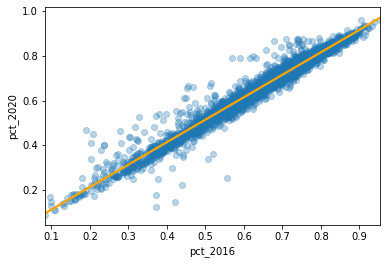

In [125]:
sns.regplot(x=full_data['pct_2016'],y=full_data['pct_2020'],scatter_kws={'alpha':0.3},
            line_kws={'color':'orange'})

In [48]:
full_data['pct_2016'].corr(full_data['pct_2020'])

0.9791918609138555

###### As the correlation is 0.98, there is a very strong correlation between the percentage of votes Trump recieved in 2016 and 2020.

### Distribution of `pct_diff`

- Plot the distribution of `pct_diff`
- Also, create a density plot by `Region`
- Anything interesting?

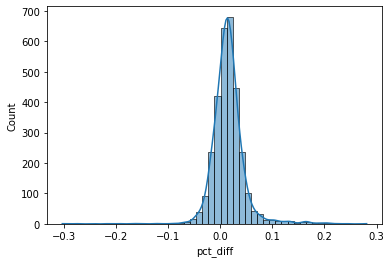

In [80]:
sns.histplot(data=full_data,x='pct_diff',bins=50,kde=True)

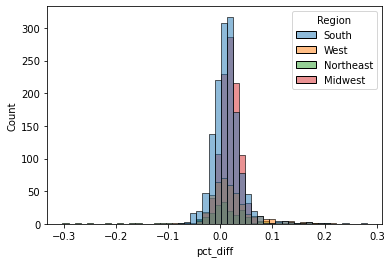

In [81]:
sns.histplot(data=full_data,x='pct_diff',hue='Region',bins=50)

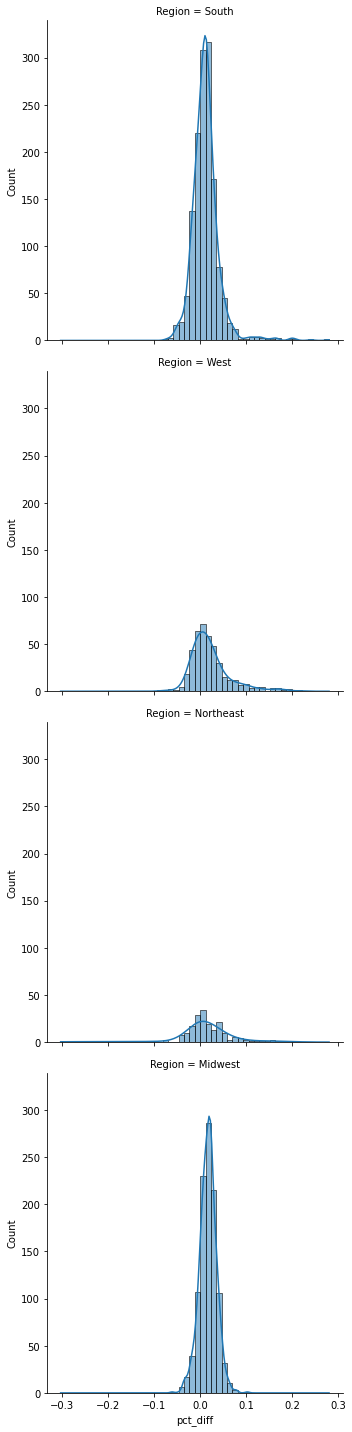

In [82]:
sns.displot(data=full_data,x='pct_diff',row='Region',bins=50,kde=True)

###### They all appear to follow a normal distirubtion



## Explore the vote change (20 percent)

- Suppose that you are interested in the relationship between `pct_diff` and following variables, `cases`, `deaths`, `Hispanic`, `White`, `Black`, `Income`, ( and maybe `pct_2016`, `pct_2020`)
- Explore the relationships through correlation analysis and visualisation. What do you find? For example:
    - What do you think is the strong determinant of the change in Trump vote percentage from 2016 to 2020?
    - The covid cases/deaths (per 1000) has any meaningful association with vote change?
    - What do you find about the race/ethnicity or income?

In [107]:
subset_data = full_data[['County','state','pct_diff','cases','deaths','Hispanic','White','Black','Income','pct_2016','pct_2020']]

In [112]:
subset_data.corrwith(subset_data['pct_diff'])

pct_diff    1.000000
cases      -0.051074
deaths     -0.022569
Hispanic    0.211519
White      -0.031580
Black      -0.118404
Income     -0.228836
pct_2016    0.026648
pct_2020    0.228958
dtype: float64

<function matplotlib.pyplot.tight_layout>

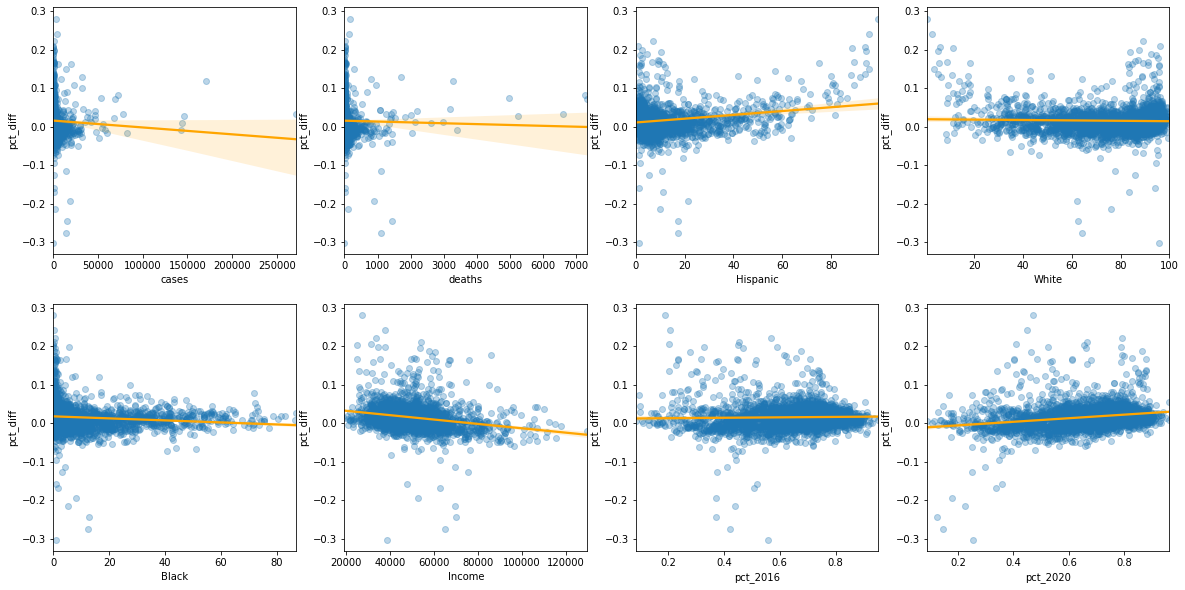

In [130]:
vars=['cases','deaths','Hispanic','White','Black','Income','pct_2016','pct_2020']

fig, axes=plt.subplots(2,4, figsize=(20,10))
axes=axes.flatten()

for i in range(len(vars)):
  sns.regplot(x=vars[i],y='pct_diff',data=subset_data,ax=axes[i],scatter_kws={'alpha':0.3}, line_kws={'color':'orange'})

plt.tight_layout

###### Based on these correlations and graphs, the biggest determinents of a change in Trump vote between 2020 and 2016 are the Hispanic population, and the income of an area. These both have negative correlation, meaning that areas where these are higher are less likley to vote for Trump. Cases and deaths had a very low correlation, meaning there is no link between these and the change in Trump's vote

## Plot the election map (15 percent)

In this question, you are asked to plot `pct_diff` on a map of counties. The shapefile is available in `cb_2018_us_county_5m.zip`.

- In this exercise:
  - You need to install `geopandas`
  - You need to decompress the zip file
  - You have to use a meaningful color scheme
- Do you find anything interesting?

Note: 

- Merging shapefile data and vote data is tricky
  1. The `GEOID` in the map data is `fips` code in the election dataset
  2. However, these two cannot be directly merged because of type mismatch (The type of `GEOID` is object, and `fips` is `int`. So, before you merge the datasets, you need to change the type of variable (c.f. `.astype()`).


In [131]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-cl2nv15i
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-cl2nv15i
     |████████████████████████████████| 14.8MB 325kB/s 
     |████████████████████████████████| 6.5MB 40.1MB/s 
  Created wheel for geopandas: filename=geopandas-0.8.0+63.gcdb4282-py2.py3-none-any.whl size=971091 sha256=99decc866001c8d7e1063c2608f2eb45b379b674ce0be94208cd4d3b230d9ef9
  Stored in directory: /tmp/pip-ephem-wheel-cache-2mbx19_m/wheels/91/24/71/376c9c67192694168352afcccc2d264248f7e2cc6192997186
Successfully built geopandas
